# **Deep Learning Lab: Transfer Learning**

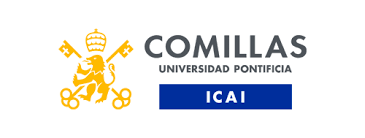

***

## Import libraries

In [12]:
from cnn import CNN
import torchvision
from cnn import load_data
from cnn import load_model_weights
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import os
import json
import wandb #https://docs.wandb.ai/ref/python/

## Log in to Weights & Biases

In [14]:
# Load environment variables from .env file
env_file = '.env'
if os.path.exists(env_file):
    with open(env_file) as f:
        env_vars = json.load(f)
        os.environ.update(env_vars)
        # Log in to Wandb using API key from environment variables
        wandb.login(key=os.getenv('WANDB_API_KEY'))
else:
    print(f'No {env_file} file found. Please create one with the following format:')
    print('{')
    print('  "WANDB_API_KEY": "your_wandb_api_key"')
    print('}')

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


## Data directory

In [7]:
# Configure data directories
train_dir = './dataset/training'
valid_dir = './dataset/validation'

## Model

In [8]:
# Set parameters
img_size = 224 # CHANGE ACCORDING TO THE INPUT SIZE OF THE MODEL 
# resnet50 - 224
# densenet121 - 224
# efficientnet_b2 - 260
# vgg16 - 224
# resnet34 - 224
epochs = 10
batch_size = 32
learning_rate = 0.001
unfreezed_layers = 4 # CHANGE ACCORDING TO THE NUMBER OF LAYERS TO UNFREEZE
criterion = nn.CrossEntropyLoss()

In [9]:
# Initialize Wandb project and experiment
name = 'densenet224' # CHANGE ACCORDING TO THE MODEL USED
wandb.init(
    # Project
    project='cnn',
    # Run name
    name=name,
    # Configurations
    config={
        'model': f'{name}-{unfreezed_layers}unfreezed-{epochs}epochs-{batch_size}batch',
        'epochs': epochs,
        'batch_size': batch_size,
        'learning_rate': learning_rate,
        'unfreezed_layers': unfreezed_layers,
        'criterion': 'CrossEntropyLoss',
    }
)

In [10]:
# Load data and model
train_loader, valid_loader, num_classes = load_data(train_dir, 
                                                    valid_dir, 
                                                    batch_size=batch_size,
                                                    img_size=img_size)

model = CNN(torchvision.models.resnet34(weights='DEFAULT'), num_classes, unfreezed_layers=unfreezed_layers) # CHANGE ACCORDING TO THE MODEL USED

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /Users/tomasa.c/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:03<00:00, 26.2MB/s]


In [11]:
# Train model
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
history = model.train_model(train_loader, valid_loader, optimizer, criterion, epochs=epochs)

Epoch 1/15 - Train Loss: 2.5506, Train Accuracy: 0.2653
Epoch 1/15 - Validation Loss: 2.6350, Validation Accuracy: 0.1807
Epoch 2/15 - Train Loss: 2.5420, Train Accuracy: 0.2710
Epoch 2/15 - Validation Loss: 2.5523, Validation Accuracy: 0.2573
Epoch 3/15 - Train Loss: 2.4862, Train Accuracy: 0.3293
Epoch 3/15 - Validation Loss: 2.4495, Validation Accuracy: 0.3667
Epoch 4/15 - Train Loss: 2.4862, Train Accuracy: 0.3310
Epoch 4/15 - Validation Loss: 2.5177, Validation Accuracy: 0.2947
Epoch 5/15 - Train Loss: 2.4957, Train Accuracy: 0.3179
Epoch 5/15 - Validation Loss: 2.4964, Validation Accuracy: 0.3160
Epoch 6/15 - Train Loss: 2.4651, Train Accuracy: 0.3511
Epoch 6/15 - Validation Loss: 2.5150, Validation Accuracy: 0.2980
Epoch 7/15 - Train Loss: 2.4767, Train Accuracy: 0.3390
Epoch 7/15 - Validation Loss: 2.4259, Validation Accuracy: 0.3873
Epoch 8/15 - Train Loss: 2.4377, Train Accuracy: 0.3755
Epoch 8/15 - Validation Loss: 2.4083, Validation Accuracy: 0.4040
Epoch 9/15 - Train Loss:

In [ ]:
# Save model
model.save(f'{name}-{epochs}epochs-{unfreezed_layers}unfreezedlayers')

In [ ]:
# Finish run
wandb.finish()

Train Accuracy,▁▆▇▇▇█████
Train Loss,█▄▂▂▂▁▁▁▁▁
Validation Accuracy,▁▆▇▇████▇█
Validation Loss,█▃▂▂▁▁▁▁▂▁
Train Accuracy,0.68543
Train Loss,2.13216
Validation Accuracy,0.71533
Validation Loss,2.10306
